# Stat Mech Project: Entropy Optimization Techniques in Machine Learning

## Import Packages

In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

## Read in Data

In [2]:
pulsar_stars = pd.read_csv('pulsar_stars.csv', header=0)
pulsar_stars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Exploratory Data Analysis
### Correlation Between Features

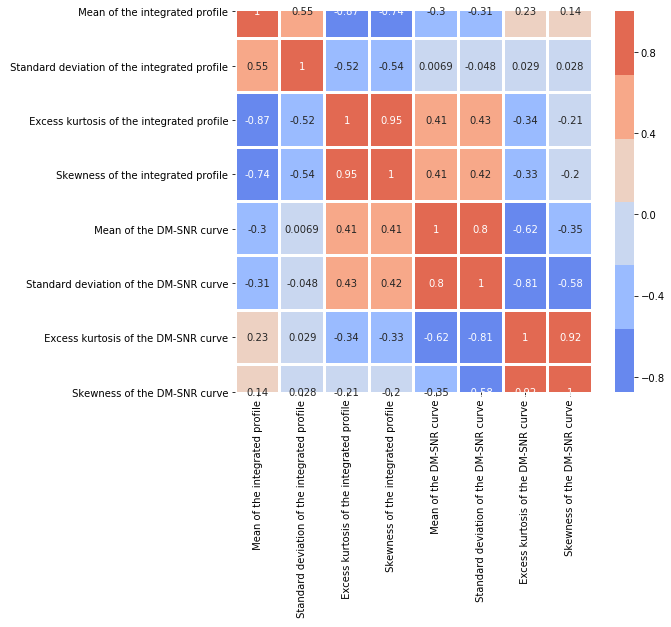

In [3]:
correlation = pulsar_stars[pulsar_stars.columns[:-1]].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(correlation, annot=True, linewidth=2, cmap=sns.color_palette('coolwarm'))
plt.show()

### Proportion of Target Variables

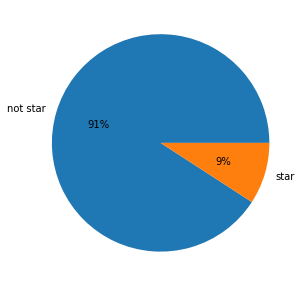

In [4]:
plt.figure(figsize=(5, 5))
pulsar_stars['target_class'].value_counts().plot.pie(labels = ["not star","star"], autopct = "%1.0f%%")
plt.ylabel("")
plt.show()

### Feature Pairplots

/home/ben/Projects/StatMechProject/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


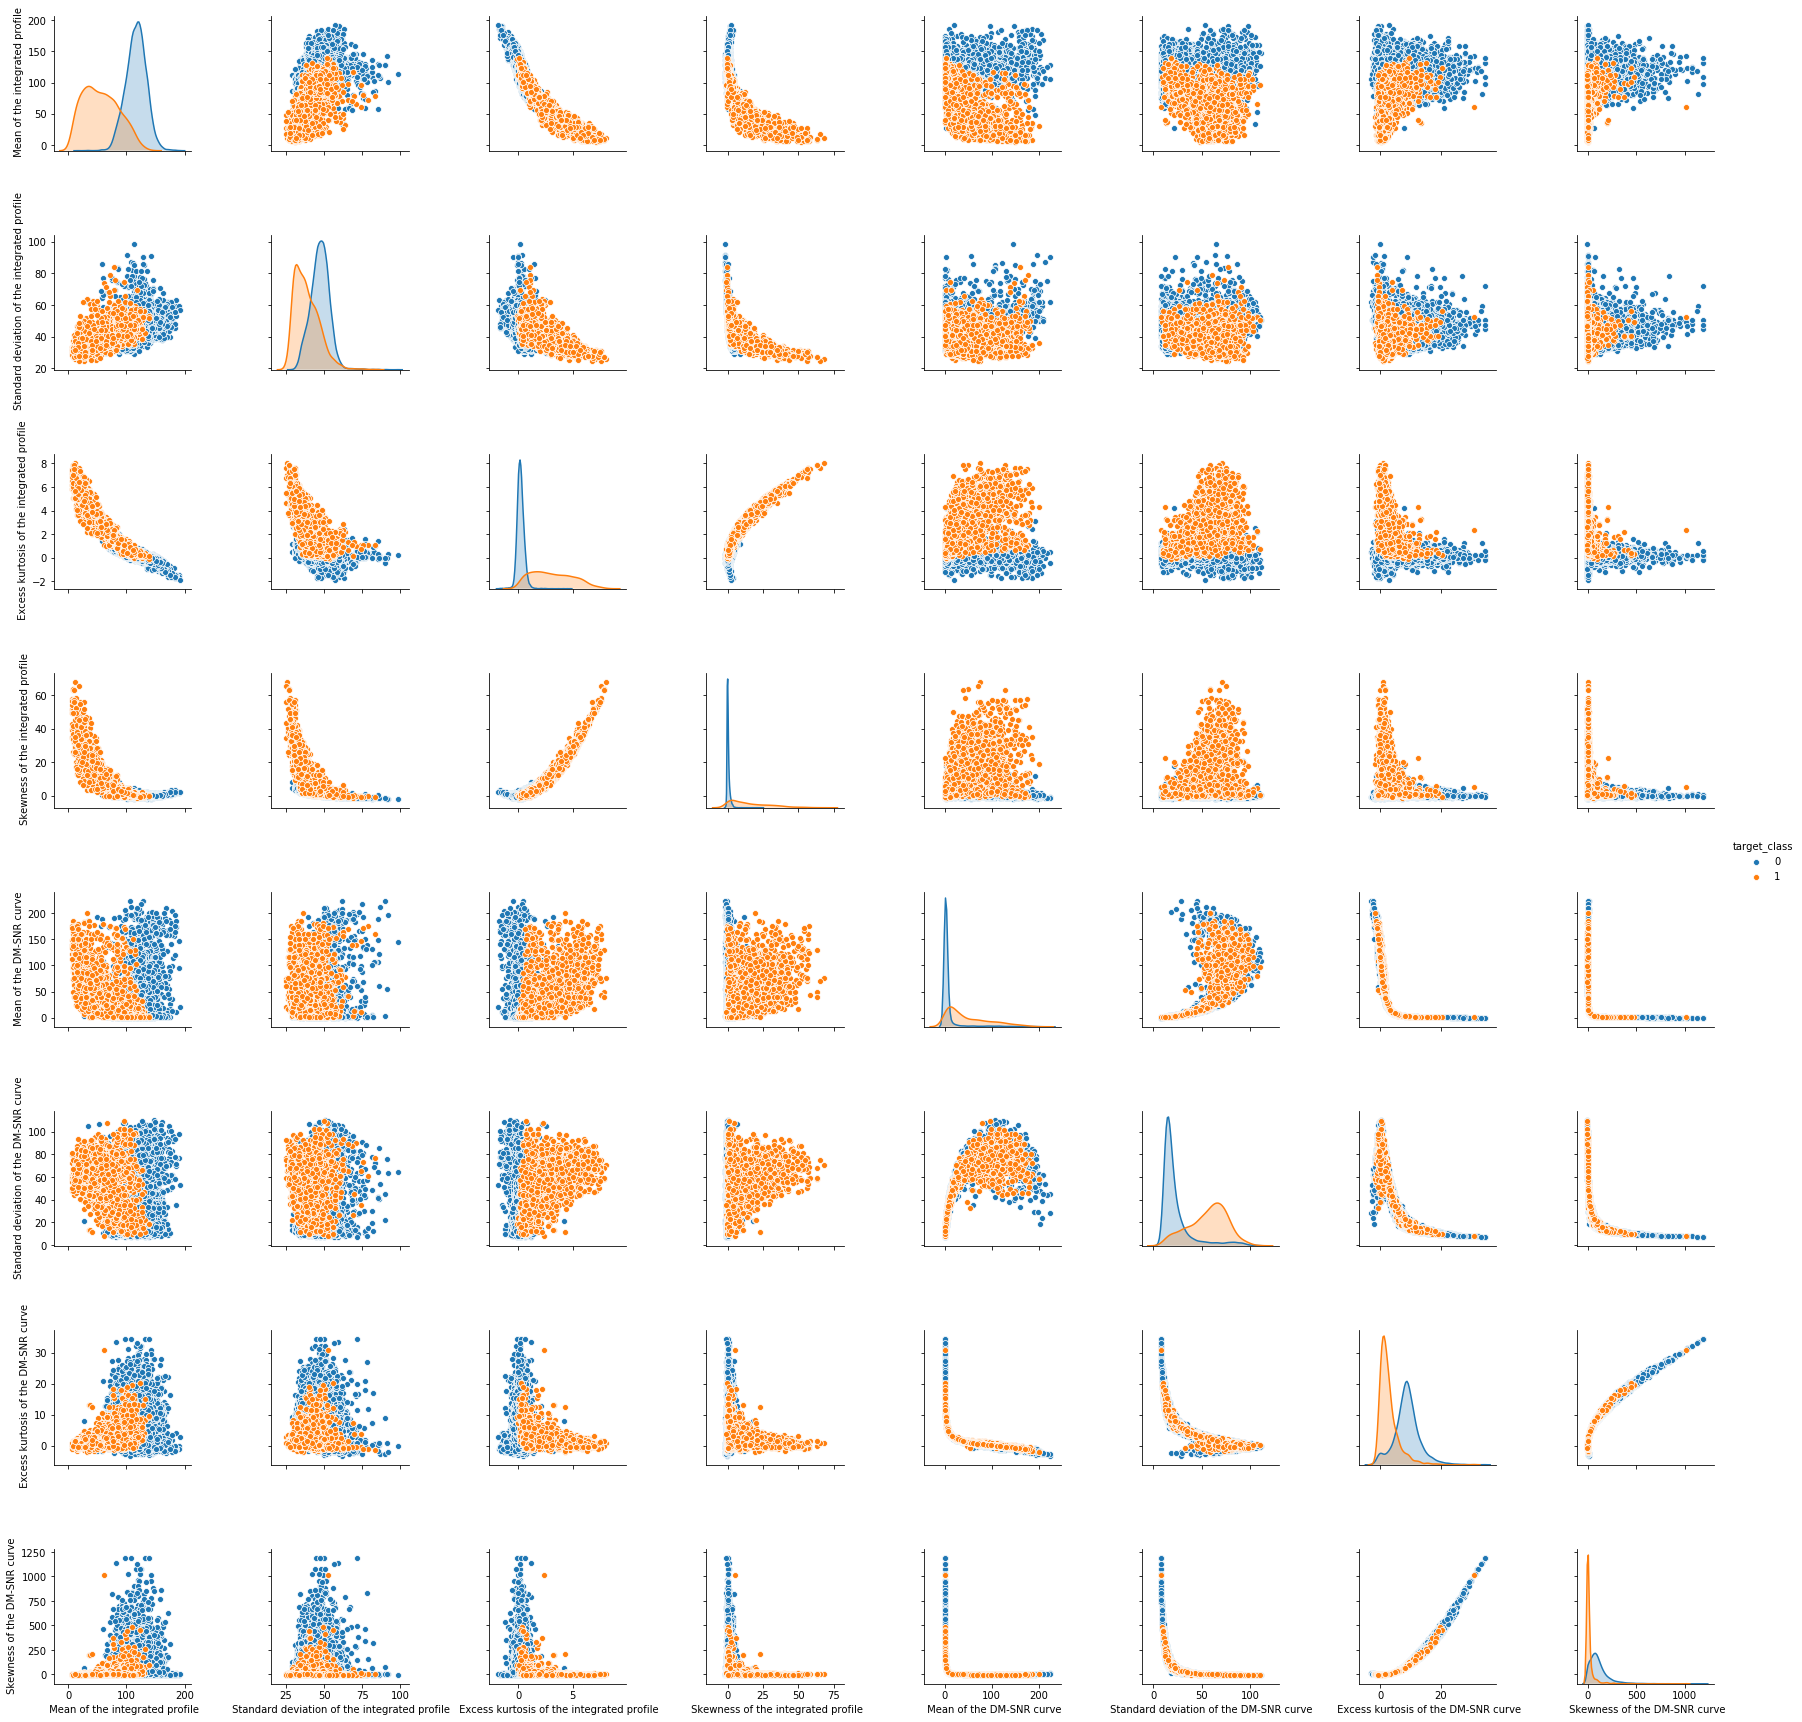

In [5]:
sns.pairplot(pulsar_stars, vars=pulsar_stars.columns[:-1], size=3, hue='target_class')
plt.show()

## Create Decision Tree

In [6]:
pre_processed = pulsar_stars.drop([' Skewness of the integrated profile', ' Skewness of the DM-SNR curve'], axis='columns')

In [7]:
data = pre_processed[pre_processed.columns[:-1]].values
targets = pre_processed['target_class'].values
x_train, x_test, y_train, y_test = train_test_split(data, targets, stratify=targets, test_size=0.8, random_state=42)
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train, y_train)
print("Accuracy: {:.2f}".format(tree.score(x_test, y_test) * 100))

Accuracy: 96.70


### Cross Validation Scores

In [8]:
tree_cv = DecisionTreeClassifier(criterion='entropy')
cv_scores = cross_val_score(tree_cv, data, targets, cv=5)
print(cv_scores)
print(np.mean(cv_scores))

[0.96759777 0.96787709 0.96480447 0.96759777 0.96897708]
0.9673708354281754


### Classification Report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13008
           1       0.81      0.83      0.82      1311

    accuracy                           0.97     14319
   macro avg       0.90      0.91      0.90     14319
weighted avg       0.97      0.97      0.97     14319



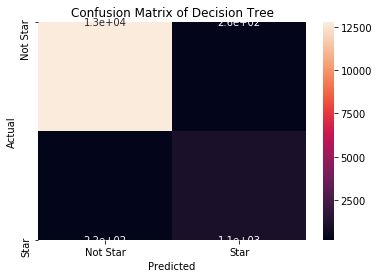

In [9]:
print(classification_report(y_test, tree.predict(x_test)))
sns.heatmap(confusion_matrix(y_test, tree.predict(x_test)), annot=True, xticklabels=['Not Star', 'Star'], yticklabels=['Not Star', 'Star'])
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualize Tree

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree, out_file=dot_data,
                max_depth=3,
                feature_names=['Mean of int prof', 'Std of int prof', 'Ex kurt of int prof', 'Mean of DM-SNR', 'Std of DM-SNR', 'Ex kurt of DM-SNR'],
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Feature Importance

In [ ]:
sns.barplot(y=pre_processed.columns[:-1], x=tree.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
rfc.fit(x_train, y_train)
print('Accuracy: {:.2f}%'.format(rfc.score(x_test, y_test) * 100))

## Random Forest CV Scores

In [ ]:
rfc_cv = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
cv_scores = cross_val_score(rfc_cv, data, targets, cv=5)
print(cv_scores)
print(np.mean(cv_scores))

### Random Forest Confusion Matrix and Classification Report

In [ ]:
print(classification_report(y_test, rfc.predict(x_test)))
sns.heatmap(confusion_matrix(y_test, rfc.predict(x_test)), annot=True, xticklabels=['Not Star', 'Star'], yticklabels=['Not Star', 'Star'])
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Feature Importance

In [ ]:
sns.barplot(y=pre_processed.columns[:-1], x=rfc.feature_importances_)
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importance')
plt.show()